# **Train from scratch** with different sample sizes


In [17]:
import copy
import random
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os
import pickle
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.metrics import confusion_matrix

buf =30
"""
plot_confusion_matrix(): prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 200 samples 100 Sample each

Confusion matrix, without normalization
[[104404562    590412]
 [   561683   1503113]]


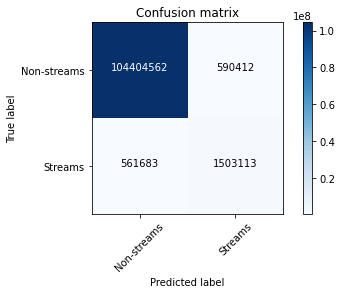

In [6]:
#prediction transfer modeltrained on 100 samples
preds_test_mod = np.load('prediction_results/prediction_result_model_train_from_scratch_NAIP_100_samples_20201012-174105.npy')

dim = np.load('Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)
count = -1
for i in range(numr):
    for j in range(numc):
        count += 1    
        if(j == 83):
            break
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)
    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]

# mask
mask = np.load('Covington_data/Total_data/mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
[lr,lc] = np.where(mask == 1)

# Read reference data
groundtruthlist = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]][lr,lc]
predictionlist = prediction_map[lr,lc]

cm = confusion_matrix((groundtruthlist).astype(int), predictionlist)
plot_confusion_matrix(cm,classes=["Non-streams","Streams"])

In [7]:
# Statistics
from sklearn.metrics import f1_score, precision_score,recall_score

print('F1 score of Nonstream: '+str(f1_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('F1 score of Stream: '+str(f1_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Precision of Nonstream: '+str(precision_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Precision of Stream: '+str(precision_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Recall of Nonstream: '+str(recall_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Recall of Stream: '+str(recall_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

F1 score of Nonstream: 0.9945128200079654
F1 score of Stream: 0.7229422644379787
Precision of Nonstream: 0.9946489178497335
Precision of Stream: 0.717981872678855
Recall of Nonstream: 0.9943767594056454
Recall of Stream: 0.7279716737149821


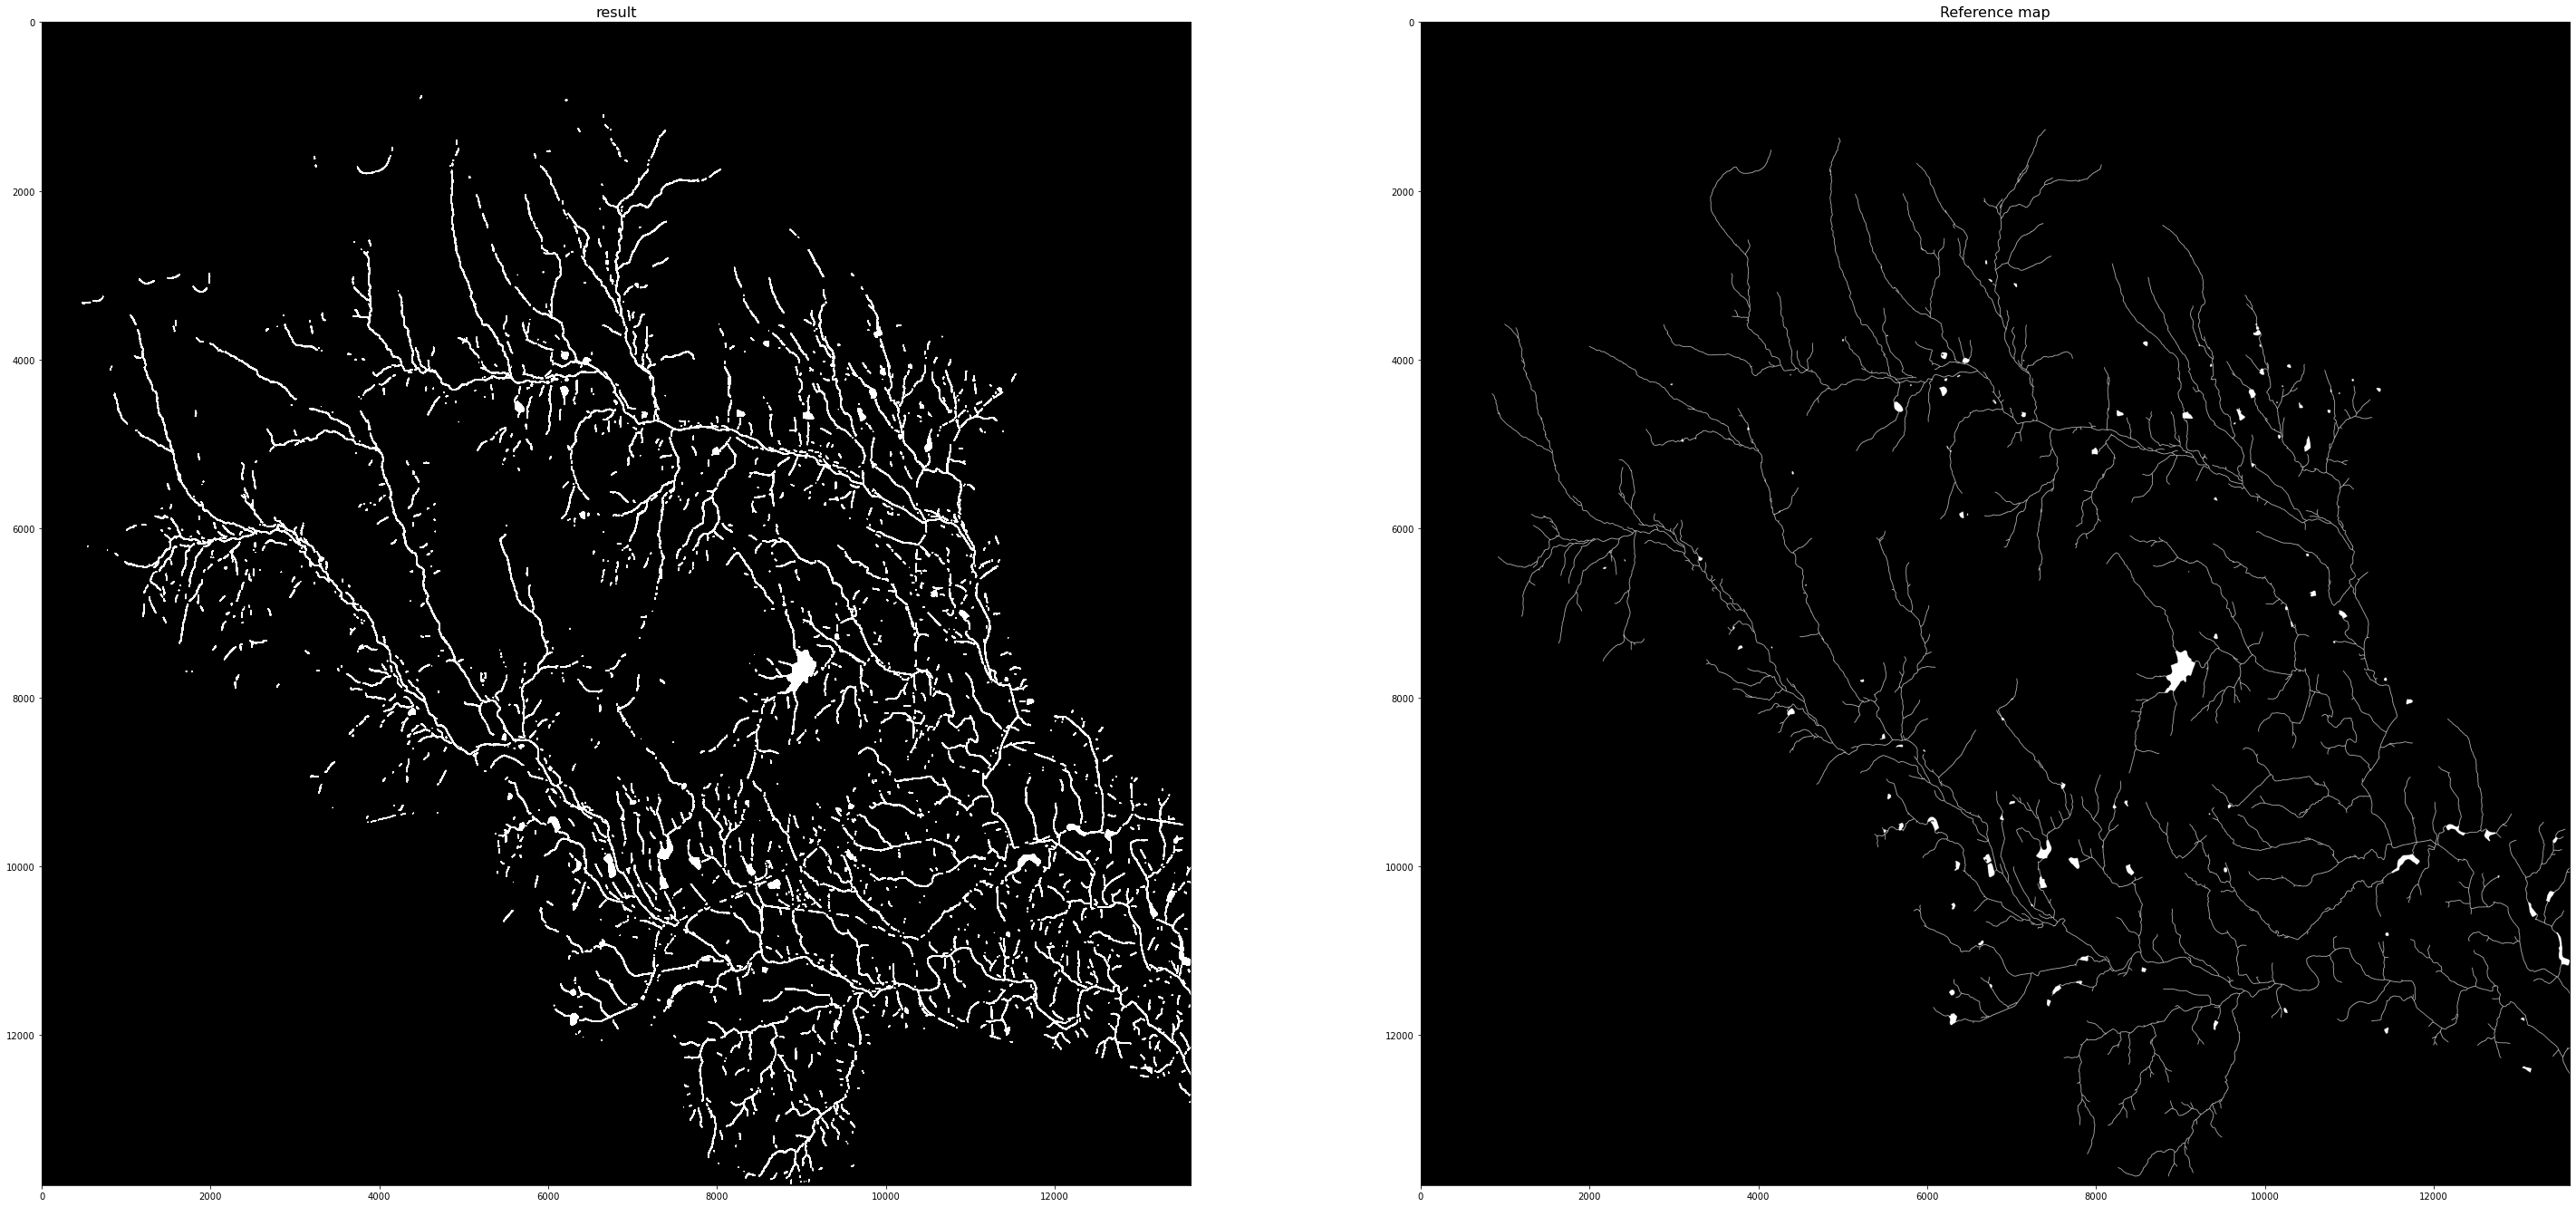

In [8]:
# Generate prediction map
import gdal    
import numpy as np
import numpy.ma as ma
import copy
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(50,50),dpi=72)

# Plot the map
prediction_map_plt = prediction_map
plt.subplot(1,2,1)
plt.title('result',fontsize = 16)
plt.imshow(prediction_map_plt*255,cmap='gray',vmin=0, vmax=1)

reference = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
plt.subplot(1,2,2)
plt.title('Reference map',fontsize = 16)
plt.imshow(reference*255,cmap='gray',vmin=0, vmax=255)
plt.show()

----

## 700 samples 350 each

Confusion matrix, without normalization
[[104508222    486752]
 [   536309   1528487]]


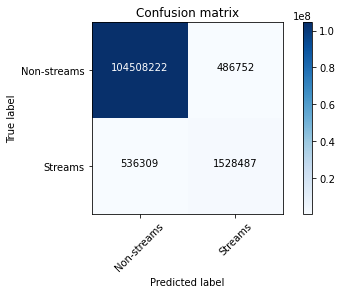

In [9]:
#prediction transfer modeltrained on 100 samples
preds_test_mod = np.load('prediction_results/prediction_result_model_train_from_scratch_NAIP_350_samples_20201013-131534.npy')

dim = np.load('Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)
count = -1
for i in range(numr):
    for j in range(numc):
        count += 1    
        if(j == 83):
            break
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)
    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]

# mask
mask = np.load('Covington_data/Total_data/mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
[lr,lc] = np.where(mask == 1)

# Read reference data
groundtruthlist = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]][lr,lc]
predictionlist = prediction_map[lr,lc]

cm = confusion_matrix((groundtruthlist).astype(int), predictionlist)
plot_confusion_matrix(cm,classes=["Non-streams","Streams"])

In [10]:
# Statistics
from sklearn.metrics import f1_score, precision_score,recall_score

print('F1 score of Nonstream: '+str(f1_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('F1 score of Stream: '+str(f1_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Precision of Nonstream: '+str(precision_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Precision of Stream: '+str(precision_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Recall of Nonstream: '+str(recall_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Recall of Stream: '+str(recall_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

F1 score of Nonstream: 0.9951291972431567
F1 score of Stream: 0.7492519059272775
Precision of Nonstream: 0.9948944605217
Precision of Stream: 0.7584643806516249
Recall of Nonstream: 0.9953640447589425
Recall of Stream: 0.7402605390556742


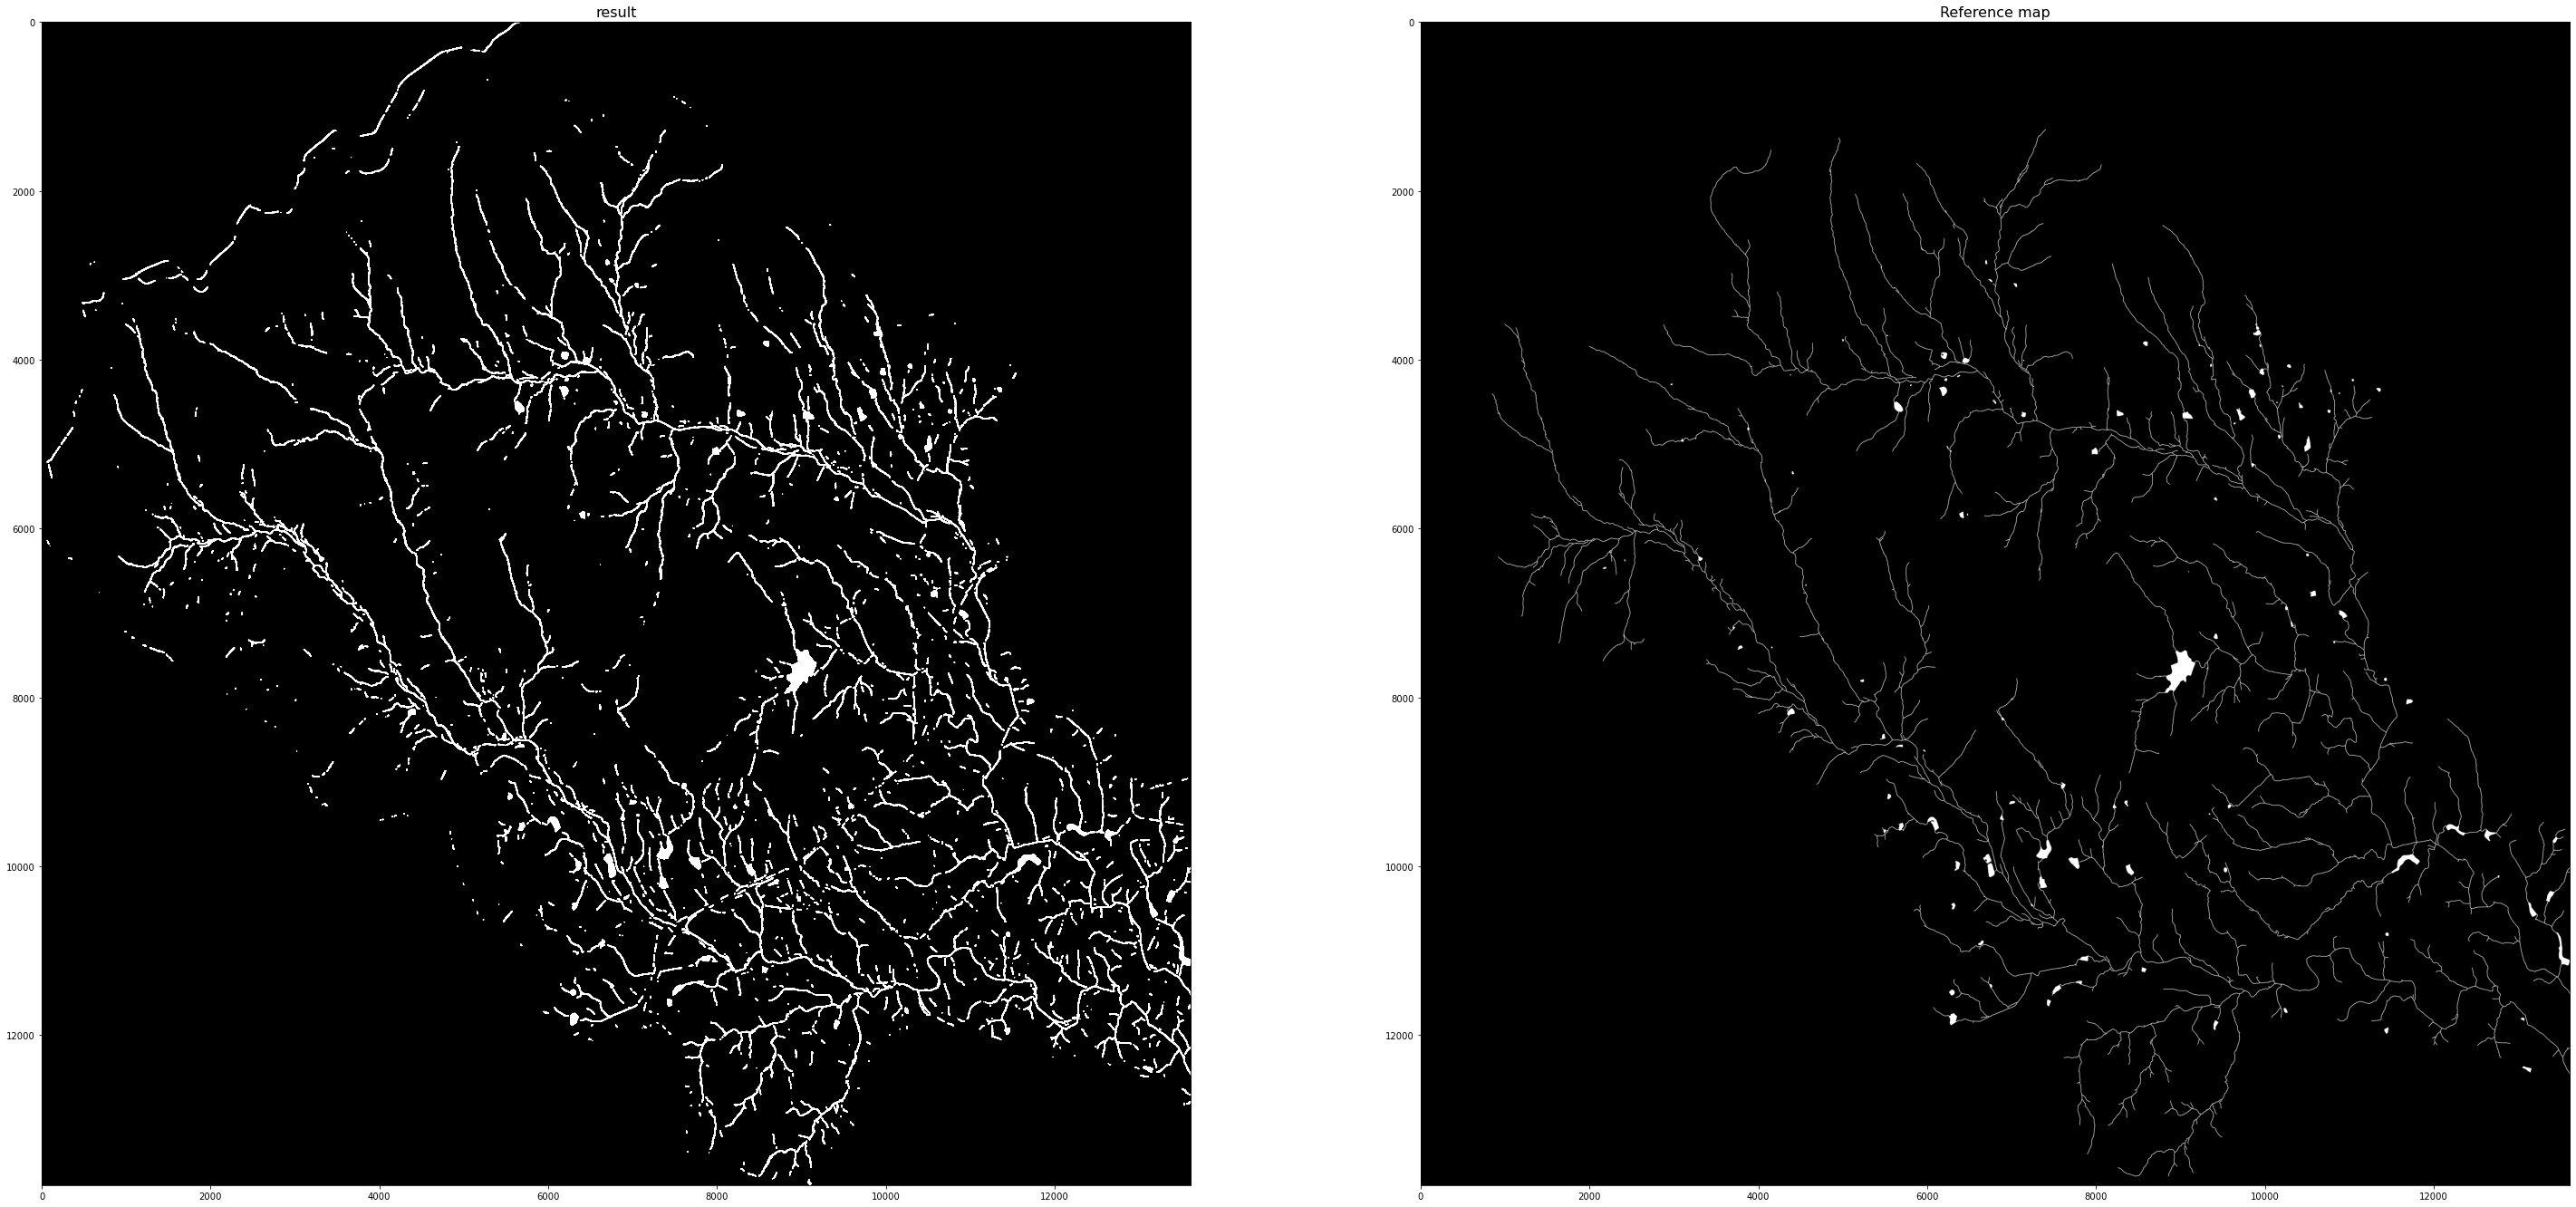

In [11]:
# Generate prediction map
import gdal    
import numpy as np
import numpy.ma as ma
import copy
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(50,50),dpi=72)

# Plot the map
prediction_map_plt = prediction_map
plt.subplot(1,2,1)
plt.title('result',fontsize = 16)
plt.imshow(prediction_map_plt*255,cmap='gray',vmin=0, vmax=1)

reference = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
plt.subplot(1,2,2)
plt.title('Reference map',fontsize = 16)
plt.imshow(reference*255,cmap='gray',vmin=0, vmax=255)
plt.show()

---
## 1000 samples 500 each 

Confusion matrix, without normalization
[[104587241    407733]
 [   390258   1674538]]


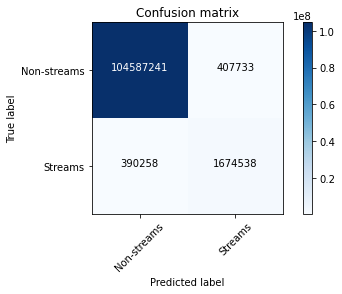

In [12]:
#prediction transfer modeltrained on 100 samples
preds_test_mod = np.load('prediction_results/prediction_result_model_train_from_scratch_NAIP_500_samples_20201012-204040.npy')

dim = np.load('Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)
count = -1
for i in range(numr):
    for j in range(numc):
        count += 1    
        if(j == 83):
            break
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)
    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]

# mask
mask = np.load('Covington_data/Total_data/mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
[lr,lc] = np.where(mask == 1)

# Read reference data
groundtruthlist = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]][lr,lc]
predictionlist = prediction_map[lr,lc]

cm = confusion_matrix((groundtruthlist).astype(int), predictionlist)
plot_confusion_matrix(cm,classes=["Non-streams","Streams"])

In [13]:
# Statistics
from sklearn.metrics import f1_score, precision_score,recall_score

print('F1 score of Nonstream: '+str(f1_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('F1 score of Stream: '+str(f1_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Precision of Nonstream: '+str(precision_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Precision of Stream: '+str(precision_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Recall of Nonstream: '+str(recall_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Recall of Stream: '+str(recall_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

F1 score of Nonstream: 0.9961995446898412
F1 score of Stream: 0.8075770176850289
Precision of Nonstream: 0.9962824604918431
Precision of Stream: 0.804188311703904
Recall of Nonstream: 0.9961166426880586
Recall of Stream: 0.8109944033211998


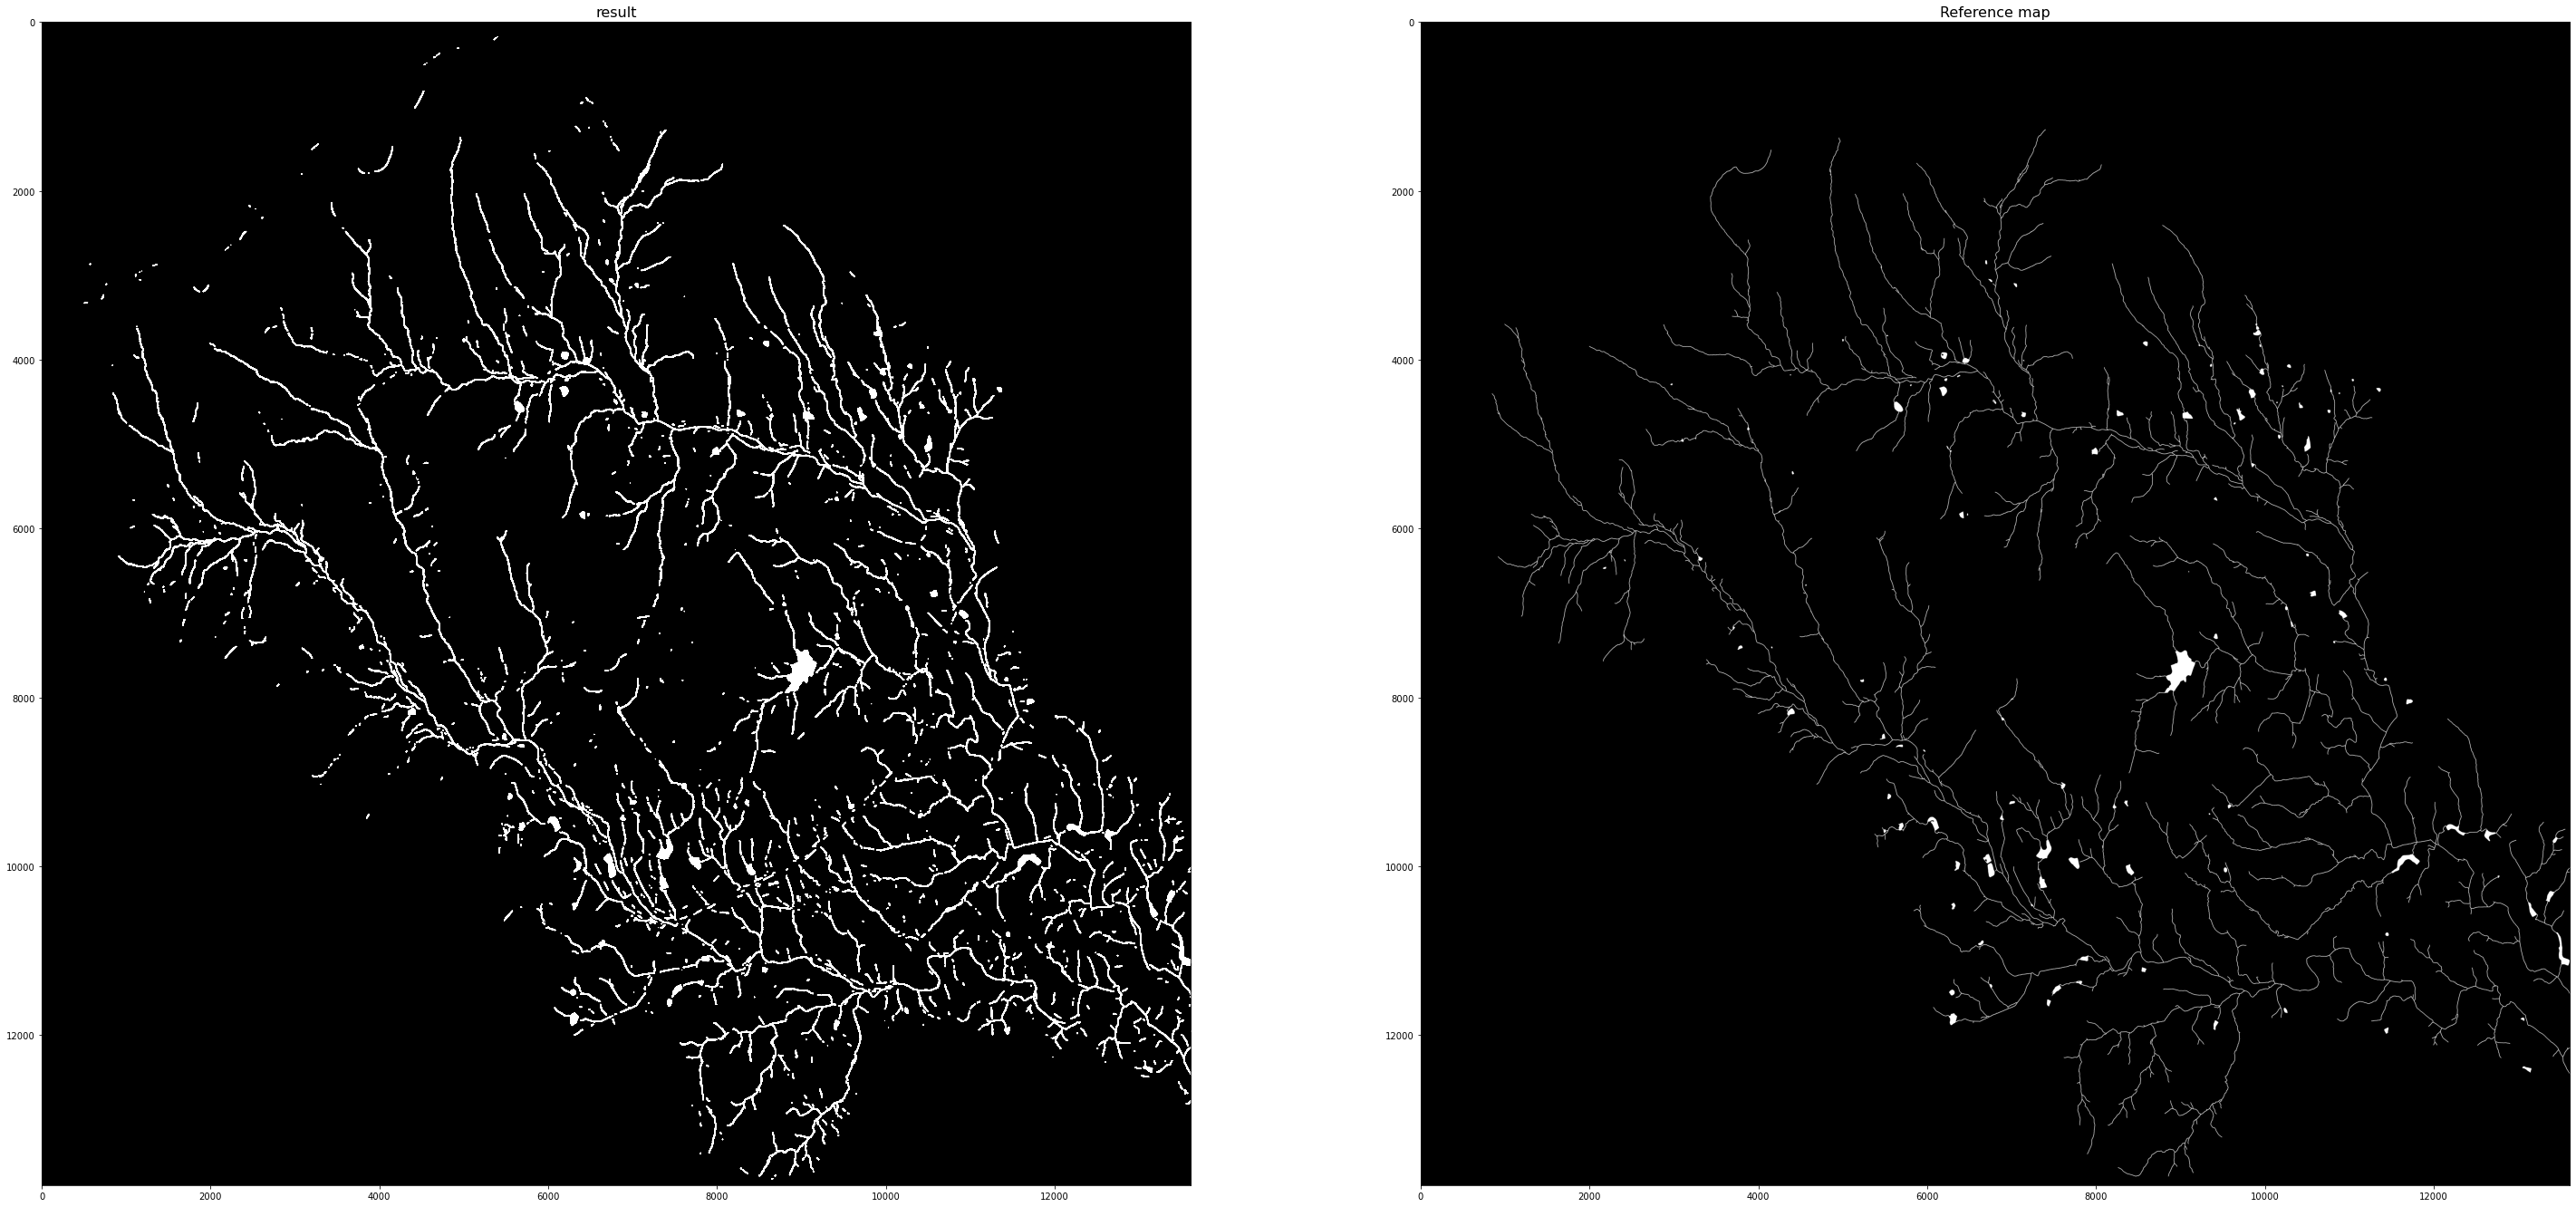

In [14]:
# Generate prediction map
import gdal    
import numpy as np
import numpy.ma as ma
import copy
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(50,50),dpi=72)

# Plot the map
prediction_map_plt = prediction_map
plt.subplot(1,2,1)
plt.title('result',fontsize = 16)
plt.imshow(prediction_map_plt*255,cmap='gray',vmin=0, vmax=1)

reference = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
plt.subplot(1,2,2)
plt.title('Reference map',fontsize = 16)
plt.imshow(reference*255,cmap='gray',vmin=0, vmax=255)
plt.show()